### Import

In [1]:
import pandas as pd
import json
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import os
import networkx as nx
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
from networkx.algorithms import community

## Description on Basic Analysis and Summary of Network.ipynb
- Contains the code for Basic Analysis and Summary of the Network  
- First section Plots the Graph Network for the Complete Facebook Network
- Second section Plots the Basic Analysis and Summary for 2 Ego Networks that was referenced in the report. 

## Functions for Analysis

In [2]:
def degree_distribution_of_graph_and_plot_log(Graph_Input, title_plot, color_input):
    # Extract the degrees for all nodes and sum it up
    nodes_list = list(Graph_Input.nodes)
    total_nodes = len(nodes_list)
    sum_d = 0
    nodes_degree_list = [] # This variable is for plotting the Distribution of Degree
    for node in nodes_list: # Sum up all types of degrees for each node in the graph
        sum_d += Graph_Input.degree(node)
        nodes_degree_list.append(Graph_Input.degree(node)) # This variable is for plotting the Distribution of Degree
    # Average Degrees Information
    avg_degree = sum_d/total_nodes

    # remove duplicate degrees in the nodes_degree_list
    degree_value_k = []
    [degree_value_k.append(x) for x in nodes_degree_list if x not in degree_value_k]

    # Count the frequency of each degree of distribution
    degree_freq_list = []
    for k in degree_value_k:
        count_degree = 0
        for degree_iterate in nodes_degree_list:
            if k == degree_iterate:
                count_degree += 1     
        degree_freq_list.append(count_degree)


    # Plot Log Scale
    fig, axs = plt.subplots(1, 1, figsize =(6,8))
    axs.set_title(title_plot, fontsize=10)
    axs.set_xlabel('Degree', fontsize=10)
    axs.set_ylabel('Frequency', fontsize=10)
    axs.plot(degree_value_k,degree_freq_list, "." +color_input)
    axs.set_xscale("log")
    axs.set_yscale("log")
    axs.tick_params(axis='both', which='major', labelsize=10)
    axs.tick_params(axis='both', which='minor', labelsize=10)
    plt.show()

In [3]:
def degree_distribution_of_graph_and_plot_linear(Graph_Input, title_plot, color_input):
    # Extract the degrees for all nodes and sum it up
    nodes_list = list(Graph_Input.nodes)
    total_nodes = len(nodes_list)
    sum_d = 0
    nodes_degree_list = [] # This variable is for plotting the Distribution of Degree
    for node in nodes_list: # Sum up all types of degrees for each node in the graph
        sum_d += Graph_Input.degree(node)
        nodes_degree_list.append(Graph_Input.degree(node)) # This variable is for plotting the Distribution of Degree
    # Average Degrees Information
    avg_degree = sum_d/total_nodes

    # remove duplicate degrees in the nodes_degree_list
    degree_value_k = []
    [degree_value_k.append(x) for x in nodes_degree_list if x not in degree_value_k]

    # Count the frequency of each degree of distribution
    degree_freq_list = []
    for k in degree_value_k:
        count_degree = 0
        for degree_iterate in nodes_degree_list:
            if k == degree_iterate:
                count_degree += 1     
        degree_freq_list.append(count_degree)


    # Plot Log Scale
    fig, axs = plt.subplots(1, 1, figsize =(6,8))
    axs.set_title(title_plot, fontsize=10)
    axs.set_xlabel('Degree', fontsize=10)
    axs.set_ylabel('Frequency', fontsize=10)
    axs.bar(degree_value_k,degree_freq_list, color=color_input)
    axs.tick_params(axis='both', which='major', labelsize=10)
    axs.tick_params(axis='both', which='minor', labelsize=10)
    plt.show()

In [4]:
def path_length_distribution_of_graph_and_plot(Graph_Input, title_plot):
    all_paths_list = []
    for nodes in list(Graph_Input.nodes()):
        all_distance = list(nx.shortest_path_length(Graph_Input, source = nodes).values()) # Extract the path lengths from source to every target
        all_paths_list += all_distance # Store the extracted path lengths here
    all_paths_list = list(filter(lambda x : x != 0, all_paths_list))
    
    # Distribution of path length
    fig, axs = plt.subplots(1, 1, figsize =(6,8))
    axs.set_title(title_plot, fontsize=10)
    # plt.title('Real-World Graph Distribution of Path Length')
    axs.set_xlabel('Path Length', fontsize=10)
    axs.set_ylabel('Number of Path Length', fontsize=10)
    #plt.yscale("log")
    # plt.hist(all_paths_list ,align='left', rwidth=0.9,color='b')
    axs.hist(all_paths_list ,align='left', rwidth=0.9,color='b')
    
    plt.show()

In [5]:
def clustering_coef_distribution_of_graph_and_plot(Graph_Input, title_plot):
    # Distribution of clustering coefficient
    clustering_coef_dist = nx.clustering(Graph_Input)
    all_coef_list = [] # This will contain all of the clustering coefficient
    for nodes in list(Graph_Input.nodes()): # extract all the clustering coefficient of each node
        all_coef_list.append(clustering_coef_dist[nodes])
    
    fig, axs = plt.subplots(1, 1, figsize =(6,8))
    axs.set_title(title_plot, fontsize=10)
    # plt.title('Real-World Graph Distribution of Clustering Coefficient')
    axs.set_xlabel('Clustering Coefficient', fontsize=10)
    axs.set_ylabel('Number of Clustering Coefficient', fontsize=10)
    #plt.yscale("log")
    axs.hist(all_coef_list ,align='left', rwidth=0.9,color='c')
    plt.show()

In [6]:
def eigenvector_centrality(Graph_Input, title_plot):
    
    # eigenvector_centrality = nx.eigenvector_centrality(G)
    centrality_dict = nx.eigenvector_centrality(Graph_Input)
    centrality_node_list = []
    for key, value in enumerate(centrality_dict):
        centrality_node_list.append(value)
    
    fig, axs = plt.subplots(1, 1, figsize =(6,8))
    axs.set_title(title_plot, fontsize=10)
    # plt.title('Real-World Graph Distribution of Clustering Coefficient')
    axs.set_xlabel('Eigenvector Centrality', fontsize=10)
    axs.set_ylabel('Frequency', fontsize=10)
    #plt.yscale("log")
    axs.hist(centrality_node_list ,align='left', rwidth=0.9,color='g')
    plt.show()   

In [7]:
# Function plots the graph 
def draw_graph(graph_input, title_input, label_bool):
    """Function plots the graph with red representing the 'A' nodes and cyan representing 'B' nodes """
    plt.figure(1,figsize=(15,15))
    ax = plt.gca()
    ax.set_title(title_input, fontsize = 15)
    nx.draw_networkx(graph_input, with_labels = label_bool, node_color='c', node_size =50, arrowsize = 8, edge_color='lightpink',font_size = 4,alpha = 0.8, ax=ax)
    plt.show()

## Plot the Facebook Network Graph

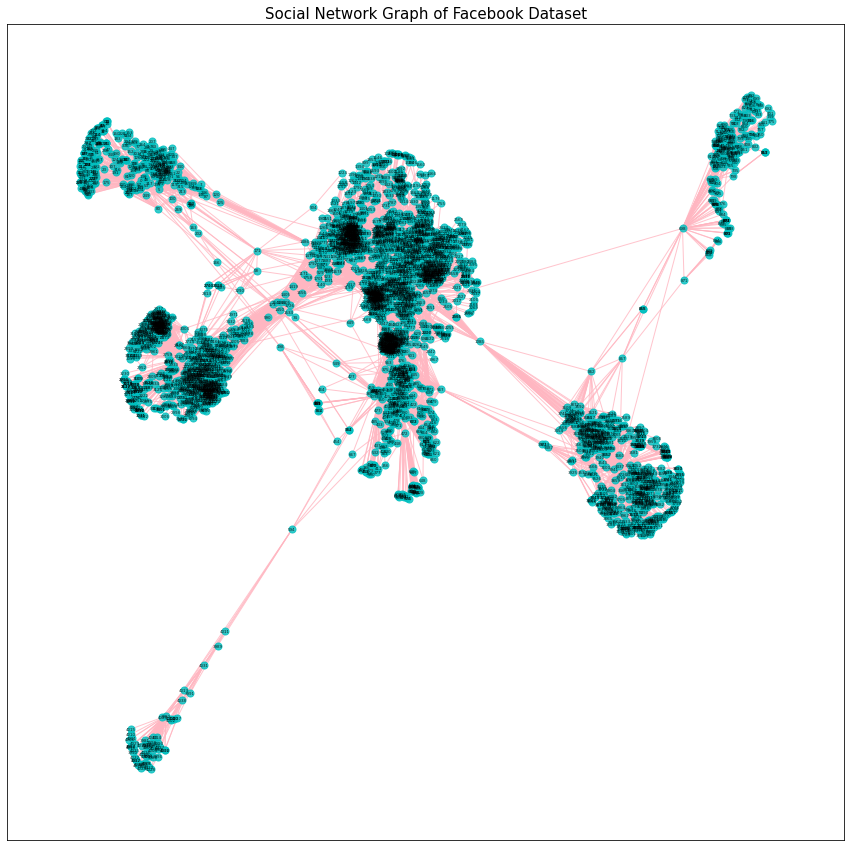

In [8]:
G = nx.read_edgelist("facebook_combined.txt",create_using=nx.Graph(),nodetype=int)

draw_graph(G, "Social Network Graph of Facebook Dataset", True)

## Plot Basic Analysis and Summaries of the Ego-Network 686.edges

In [9]:
G = nx.read_edgelist("686.edges",create_using=nx.Graph(),nodetype=int)
number_nodes = len(list(G.nodes()))
number_edges = len(list(G.edges()))
number_connected_components = nx.number_connected_components(G)
size_largest_connected_component = len(max(nx.connected_components(G), key=len))

##############################################################
print(""" 
          Summary "686.edges" Ego-Network: 
          Number of Nodes : {}
          Number of Edges : {}
          Number of Connected Component : {}
          Size of the Largest Connected Component : {}
          """.format(number_nodes, number_edges, number_connected_components, size_largest_connected_component))

 
          Summary "686.edges" Ego-Network: 
          Number of Nodes : 168
          Number of Edges : 1656
          Number of Connected Component : 1
          Size of the Largest Connected Component : 168
          


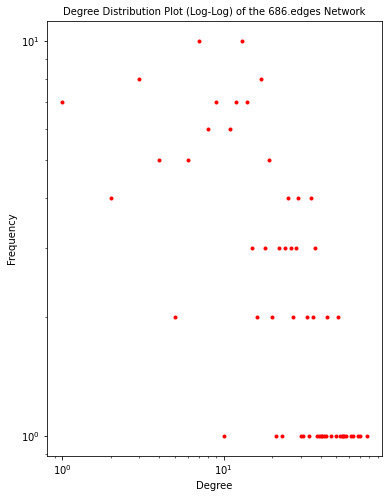

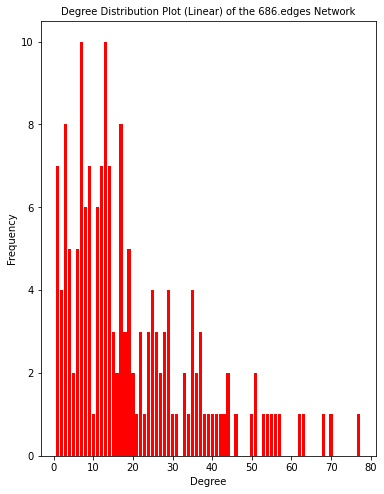

In [10]:
degree_distribution_of_graph_and_plot_log(G, 'Degree Distribution Plot (Log-Log) of the 686.edges Network' , 'r')
degree_distribution_of_graph_and_plot_linear(G, 'Degree Distribution Plot (Linear) of the 686.edges Network' , 'r')

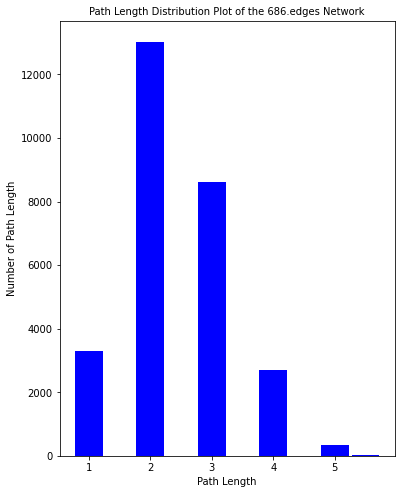

In [11]:
path_length_distribution_of_graph_and_plot(G, 'Path Length Distribution Plot of the 686.edges Network' )

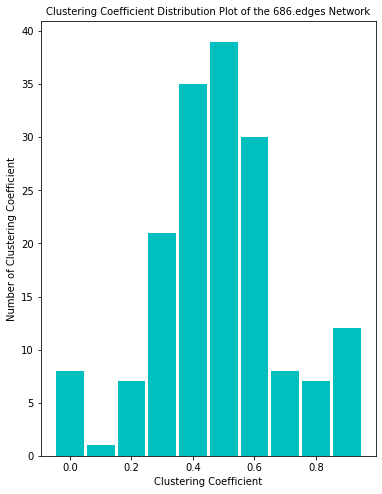

In [12]:
clustering_coef_distribution_of_graph_and_plot(G, 'Clustering Coefficient Distribution Plot of the 686.edges Network')

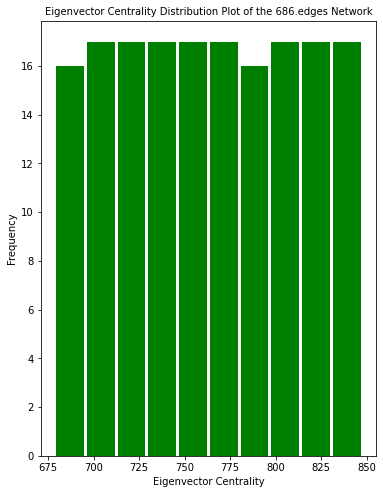

In [13]:
eigenvector_centrality(G, 'Eigenvector Centrality Distribution Plot of the 686.edges Network')

## Plot Basic Analysis and Summaries of the Ego-Network 107.edges

In [14]:
G = nx.read_edgelist("107.edges",create_using=nx.Graph(),nodetype=int)
number_nodes = len(list(G.nodes()))
number_edges = len(list(G.edges()))
number_connected_components = nx.number_connected_components(G)
size_largest_connected_component = len(max(nx.connected_components(G), key=len))

##############################################################
print(""" 
          Summary "686.edges" Ego-Network: 
          Number of Nodes : {}
          Number of Edges : {}
          Number of Connected Component : {}
          Size of the Largest Connected Component : {}
          """.format(number_nodes, number_edges, number_connected_components, size_largest_connected_component))

 
          Summary "686.edges" Ego-Network: 
          Number of Nodes : 1034
          Number of Edges : 26749
          Number of Connected Component : 1
          Size of the Largest Connected Component : 1034
          


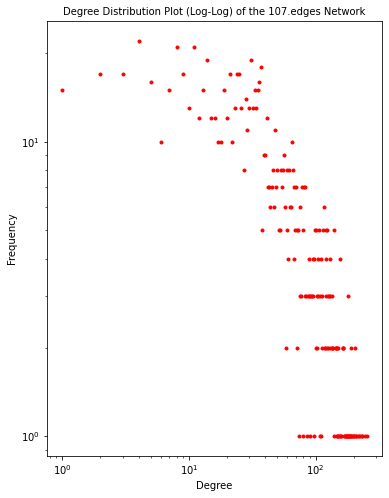

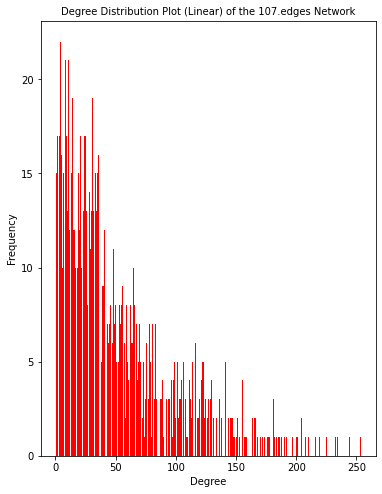

In [15]:
degree_distribution_of_graph_and_plot_log(G, 'Degree Distribution Plot (Log-Log) of the 107.edges Network' , 'r')
degree_distribution_of_graph_and_plot_linear(G, 'Degree Distribution Plot (Linear) of the 107.edges Network' , 'r')

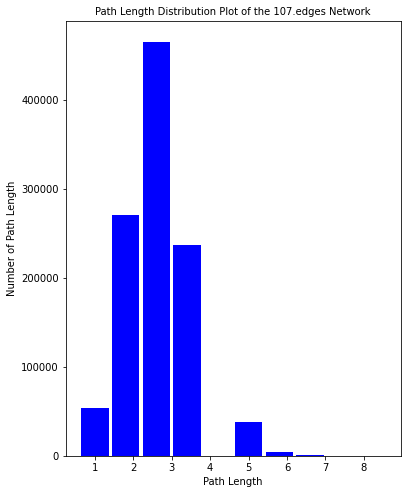

In [16]:
path_length_distribution_of_graph_and_plot(G, 'Path Length Distribution Plot of the 107.edges Network' )

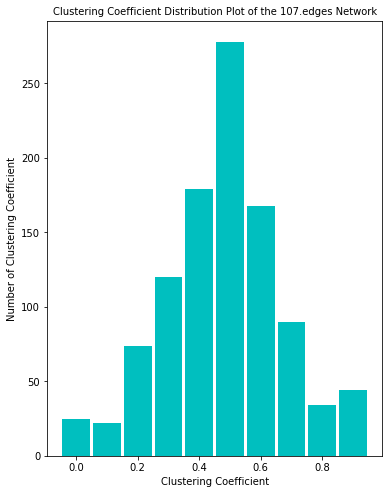

In [17]:
clustering_coef_distribution_of_graph_and_plot(G, 'Clustering Coefficient Distribution Plot of the 107.edges Network')

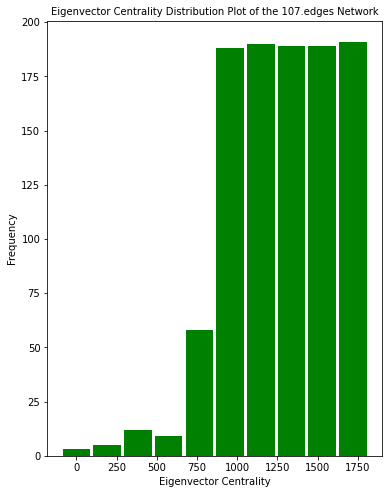

In [18]:
eigenvector_centrality(G, 'Eigenvector Centrality Distribution Plot of the 107.edges Network')